解析中: 8_deskofwood.wav ...
完了しました！画像を確認してください: spectrum_analysis.png


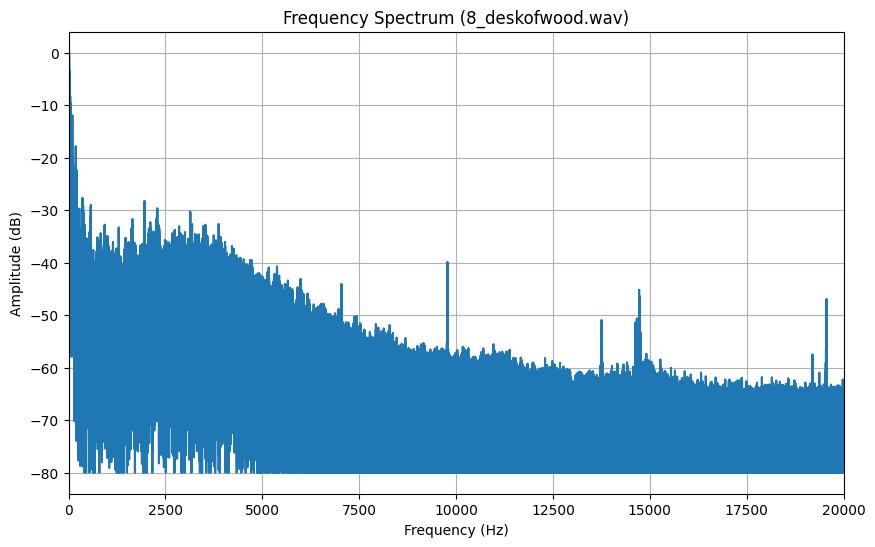

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# ==========================================
# 設定エリア
# ==========================================
FILENAME = "8_deskofwood.wav"  # 解析したいファイル名
START_SEC = 0               # 解析開始位置（秒）
DURATION = None             # 解析する長さ（秒） Noneなら最後まで
# ==========================================

def plot_spectrum():
    # 1. 音声の読み込み
    print(f"解析中: {FILENAME} ...")
    try:
        # sr=None で元のサンプリングレートを維持
        y, sr = librosa.load(FILENAME, sr=None, offset=START_SEC, duration=DURATION)
    except FileNotFoundError:
        print("エラー: ファイルが見つかりません。")
        return

    # 2. 高速フーリエ変換 (FFT) を実行
    # 音を「波」から「周波数の成分」に分解する計算です
    fft_result = np.fft.fft(y)
    
    # 3. 周波数軸の作成
    # データ数とサンプリングレートから、横軸（Hz）の目盛りを作ります
    n = len(y)
    freqs = np.fft.fftfreq(n, d=1/sr)

    # 4. 振幅スペクトルの計算
    # 計算結果は複素数なので、絶対値を取って「強さ」にします
    # さらに半分（正の周波数成分だけ）を取り出します
    magnitude = np.abs(fft_result)[:n//2]
    freqs = freqs[:n//2]

    # 5. デシベル (dB) に変換
    # 音の強さは対数（ログ）で見ないと人間には分かりづらいため
    magnitude_db = librosa.amplitude_to_db(magnitude, ref=np.max)

    # 6. グラフ描画
    plt.figure(figsize=(10, 6))
    
    # 波形をプロット
    plt.plot(freqs, magnitude_db)
    
    # グラフの見た目を調整
    plt.title(f"Frequency Spectrum ({FILENAME})")
    plt.xlabel("Frequency (Hz)") # 横軸：周波数
    plt.ylabel("Amplitude (dB)") # 縦軸：音の大きさ
    plt.grid(True)               # グリッド線を表示
    
    # 横軸の範囲指定（人間の可聴域に合わせて 0Hz 〜 20000Hz くらいを表示）
    plt.xlim([0, 20000]) 
    
    # 画像として保存
    output_img = "spectrum_analysis.png"
    plt.savefig(output_img)
    print(f"完了しました！画像を確認してください: {output_img}")
    
    # (オプション) 画面に表示したい場合は以下を有効化
    # plt.show()

if __name__ == "__main__":
    plot_spectrum()